Classes détectées : ['Afghan_hound', 'African_hunting_dog', 'Airedale', 'American_Staffordshire_terrier', 'Appenzeller', 'Australian_terrier', 'Bedlington_terrier', 'Bernese_mountain_dog', 'Blenheim_spaniel', 'Border_collie', 'Border_terrier', 'Boston_bull', 'Bouvier_des_Flandres', 'Brabancon_griffon', 'Brittany_spaniel', 'Cardigan', 'Chesapeake_Bay_retriever', 'Chihuahua', 'Dandie_Dinmont', 'Doberman', 'English_foxhound', 'English_setter', 'English_springer', 'EntleBucher', 'Eskimo_dog', 'French_bulldog', 'German_shepherd', 'German_short-haired_pointer', 'Gordon_setter', 'Great_Dane', 'Great_Pyrenees', 'Greater_Swiss_Mountain_dog', 'Ibizan_hound', 'Irish_setter', 'Irish_terrier', 'Irish_water_spaniel', 'Irish_wolfhound', 'Italian_greyhound', 'Japanese_spaniel', 'Kerry_blue_terrier', 'Labrador_retriever', 'Lakeland_terrier', 'Leonberg', 'Lhasa', 'Maltese_dog', 'Mexican_hairless', 'Newfoundland', 'Norfolk_terrier', 'Norwegian_elkhound', 'Norwich_terrier', 'Old_English_sheepdog', 'Pekine

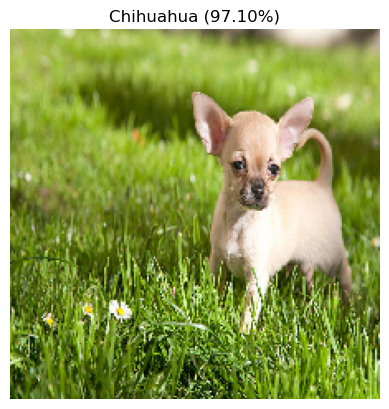

In [17]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Charger le modèle fine-tuned
model = tf.keras.models.load_model('dog_model_finetuined.h5')

# Dictionnaire des classes (à adapter avec ton propre mapping)
# Ici on récupère les classes du dossier train si possible
import os
base_dir = '../dogs_dataset/images'
class_names = sorted(os.listdir(base_dir))  # Liste des sous-dossiers (races)

print("Classes détectées :", class_names)

def predict_race(img_path):
    img_size = (224, 224)  # même taille que le modèle
    img = image.load_img(img_path, target_size=img_size)
    x = image.img_to_array(img) / 255.0
    x = np.expand_dims(x, axis=0)  # ajouter batch dimension
    
    preds = model.predict(x)
    class_idx = np.argmax(preds)
    predicted_class = class_names[class_idx]
    confidence = preds[0][class_idx]
    
    print(f"Prédiction : {predicted_class} avec {confidence*100:.2f}% de confiance")
    
    plt.imshow(img)
    plt.title(f"{predicted_class} ({confidence*100:.2f}%)")
    plt.axis('off')
    plt.show()

# Exemple d'utilisation (change le chemin vers ta photo)
predict_race('../pi.jpg')
